In [169]:
import pandas as pd
import numpy as np

from sklearn.metrics import balanced_accuracy_score 
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 


In [159]:
X_train_file = 'X_train.csv'
y_train_file = 'y_train.csv'
X_test_file  = 'X_test.csv'

labels_df = pd.read_csv(y_train_file)
train_df  = pd.read_csv(X_train_file)
test_df   = pd.read_csv(X_test_file)

train_df.insert(0,'y',labels_df['y'])

labels_df = labels_df.set_index('id')
train_df  = train_df .set_index('id')
test_df   = test_df  .set_index('id')

In [183]:
print('train_df.shape =', train_df.shape)
print('test_df.shape  =', test_df.shape)
print('y distribution: ')
print(train_df['y'].value_counts())
print('We are told that \"Test set has the same class imbalance as the training set.\"')

train_df.shape = (4800, 1001)
test_df.shape  = (4100, 1000)
y distribution: 
1    3600
2     600
0     600
Name: y, dtype: int64
We are told that "Test set has the same class imbalance as the training set."


In [184]:
def mean_std_normalise(df):
    return (df-df.mean())/df.std()

def min_max_normalise(df):
    return (2*df-df.min()-df.max())/(df.max()-df.min())

In [186]:
X_df = mean_std_normalise(train_df.drop(columns='y'))
y_df = train_df['y']

In [187]:
# dividing X, y into train and test data 
X = X_df.values
y = y_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [188]:
print("train shape = ", np.shape(X_train))
print("test shape  = ", np.shape(X_test))
print()
print('n0test =', np.sum((y_test == 0)))
print('n1test =', np.sum((y_test == 1)))
print('n2test =', np.sum((y_test == 2)))
print()
  
print('n0train =', np.sum((y_train == 0)))
print('n1train =', np.sum((y_train == 1)))
print('n2train =', np.sum((y_train == 2)))
print()

train shape =  (3600, 1000)
test shape  =  (1200, 1000)

n0test = 154
n1test = 890
n2test = 156

n0train = 446
n1train = 2710
n2train = 444



In [189]:
# training a DescisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 10000).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
BMAC = balanced_accuracy_score(y_test, dtree_predictions)
BMAC

0.5020394087809817

In [194]:
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test)
BMAC = balanced_accuracy_score(y_test, svm_predictions)
BMAC

0.5670571625627805

In [192]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
knn_predictions = knn.predict(X_test)  
BMAC = balanced_accuracy_score(y_test, knn_predictions)
BMAC

0.5353047701362308

In [193]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
BMAC = balanced_accuracy_score(y_test, gnb_predictions)
BMAC

0.6090340994835377

In [ ]:
### Ignore BELOW here

In [103]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)

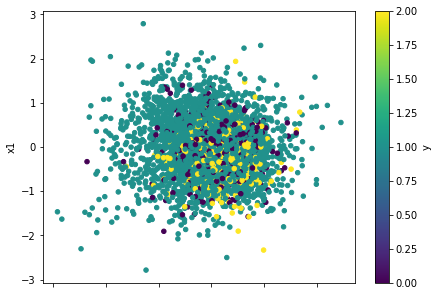

In [104]:
train_df.plot.scatter(x='x0', y='x1', c='y',colormap='viridis')
plt.show()

ok, so we have tons of dimensions and I want to get the useful ones.

PCA seems like a good idea, but remember that you have imbalanced classes!
Intuitively for me imbalanced classes will also imbalance PCA.
Does PCA make sense for classification? YES, but not for multiclass, as there is no induced ordering.

We have to take a 1-vs-X approach ALREADY...

To make things simple for my self I will start with

### PCA 1 vs 1 (between the two balanced classes, y =  0 and y = 2)

In [123]:
full_02 = train_df[train_df['y'] != 1]
print(full_02.shape)

(1200, 1001)


In [124]:
def mean_std_normalise(df):
    return (df-df.mean())/df.std()

def min_max_normalise(df):
    return (2*df-df.min()-df.max())/(df.max()-df.min())

In [125]:
full_02 = mean_std_normalise(full_02)
full_02['y'] = min_max_normalise(full_02['y'])
full_02.describe()

,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x990,x991,x992,x993,x994,x995,x996,x997,x998,x999
count,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,...,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03
mean,-3.700743e-17,1.687539e-16,3.160435e-16,6.069219e-17,8.881784e-18,7.512509e-16,4.648134e-16,1.480297e-18,1.595761e-15,3.123427e-16,...,-1.509903e-16,-3.079019e-16,-6.513308e-17,-1.262694e-15,-1.882938e-15,-1.731948e-16,-1.021405e-15,-1.211623e-15,7.401487e-18,-1.361874e-16
std,1.000417e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.000000e+00,-5.734909e+00,-4.618383e+00,-3.840491e+00,-3.557715e+00,-3.412796e+00,-4.231241e+00,-4.136532e+00,-3.698224e+00,-3.158603e+00,...,-5.535682e+00,-3.108055e+00,-4.662632e+00,-4.490234e+00,-3.985722e+00,-4.048529e+00,-3.943014e+00,-2.632581e+00,-3.347424e+00,-3.607002e+00
25%,-1.000000e+00,-5.795316e-01,-5.822210e-01,-6.346489e-01,-6.538439e-01,-6.397421e-01,-5.508307e-01,-5.768602e-01,-6.509701e-01,-6.380948e-01,...,-5.780164e-01,-7.072089e-01,-5.974325e-01,-5.850499e-01,-6.572661e-01,-5.816348e-01,-6.216814e-01,-7.029580e-01,-6.137194e-01,-6.257732e-01
50%,-5.551115e-17,3.199443e-02,-5.273730e-04,5.326936e-02,-4.314056e-02,-1.575575e-02,2.908269e-02,5.271665e-02,-1.876064e-02,-1.345977e-01,...,3.930057e-02,-1.149751e-01,6.212803e-02,5.433636e-02,-2.404777e-02,1.204177e-01,-3.753296e-02,-1.227529e-01,3.586021e-02,-7.552671e-02
75%,1.000000e+00,5.925439e-01,5.953146e-01,6.315577e-01,6.529658e-01,5.605763e-01,5.975794e-01,6.494862e-01,6.400318e-01,5.160933e-01,...,6.072008e-01,5.313968e-01,6.707895e-01,6.583561e-01,6.036221e-01,6.919938e-01,5.500457e-01,5.388744e-01,5.759955e-01,5.907778e-01
max,1.000000e+00,3.596536e+00,4.325147e+00,4.080057e+00,3.986142e+00,6.929494e+00,3.278252e+00,4.124444e+00,3.600671e+00,4.937552e+00,...,3.707075e+00,4.640742e+00,3.348578e+00,3.684097e+00,3.801287e+00,2.918259e+00,4.416139e+00,5.128499e+00,3.998124e+00,3.768762e+00


In [126]:
X = full_02.drop(columns = 'y').values
y = full_02['y'].values
print('shape(X) = ', np.shape(X))
print('shape(y) = ', np.shape(y))

shape(X) =  (1200, 1000)
shape(y) =  (1200,)


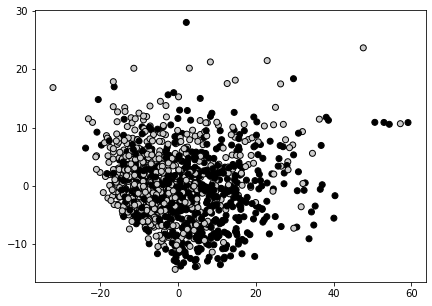

In [127]:
# PCA seems like a good idea, but remember that you have imbalanced classes!
# Intuitively for me imbalanced classes will also imbalance PCA.

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
princX = pca.transform(X)
plt.scatter(princX[:, 0], princX[:, 1], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')
plt.show()

/Users/Seb/anaconda3/envs/aml/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


[[ 0.20880774  0.        ]
 [-0.37123965  0.        ]
 [ 0.21836804  0.        ]
 ...
 [ 0.26826673  0.        ]
 [ 0.31923045  0.        ]
 [ 0.12831845  0.        ]]


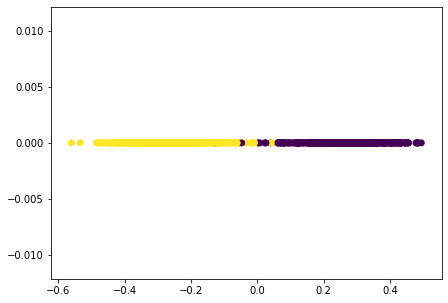

In [128]:
from sklearn.cross_decomposition import CCA
princX = CCA(n_components=2).fit(X, y).transform(X)
print(princX)
plt.scatter(princX[:, 0], princX[:, 1], c=y)
plt.show()

In [1]:
import numpy as np
#from fancyimpute import simple_fill
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score


In [44]:
### 1. normalise

#X_in = X_imp;
#X_out = Xt_imp;
X_tot = X_imp
#X_tot = np.concatenate((X_in, X_out), axis=0)
scaler = StandardScaler()
X_tot = scaler.fit_transform(X_tot)
X_in = X_tot[:X_in.shape[0],:]
X_out = X_tot[X_in.shape[0]:,:]
print(X_in.shape)
print(X_out.shape)